# Species Segmentation with Cluster Analysis 

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: 'iris.csv'.

In [2]:
df = pd.read_csv('IRIS.csv')
x = df.iloc[:, [0, 1, 2, 3]].values

## Explore the data

In [3]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Check to see if there are any null values in the dataset.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Plot the data

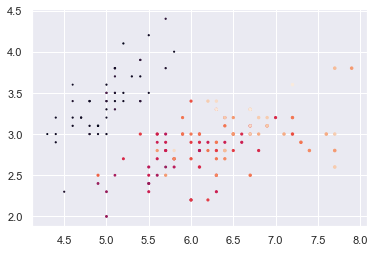

In [6]:
plt.scatter(df['sepal_length'],df['sepal_width'],df['petal_length'],df['petal_width'])


## Clustering unscaled data

In [7]:
categorical = df.select_dtypes('object').columns
print(f'Categorical Columns: {df[categorical].columns}')

Categorical Columns: Index(['species'], dtype='object')


In [8]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
clusters = x.copy()
clusters=kmeans.fit_predict(x)

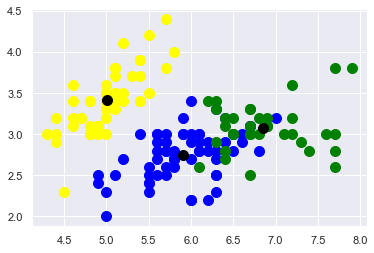

In [10]:
#Visualising the clusters
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

## Standardize the variables

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Determining number of clusters based on Elbow Method

In [20]:

wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
# Note: Due to recent changes in the library, the for loop doesn't run if the range starts with 1.

Text(0, 0.5, 'WCSS')

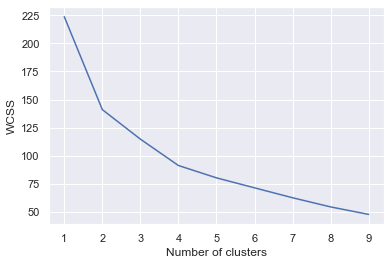

In [13]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Clustering (scaled data)

In [18]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = df.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [16]:
clusters_new.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_pred
51,6.4,3.2,4.5,1.5,Iris-versicolor,2
21,5.1,3.7,1.5,0.4,Iris-setosa,1
85,6.0,3.4,4.5,1.6,Iris-versicolor,2
86,6.7,3.1,4.7,1.5,Iris-versicolor,2
102,7.1,3.0,5.9,2.1,Iris-virginica,2
137,6.4,3.1,5.5,1.8,Iris-virginica,2
52,6.9,3.1,4.9,1.5,Iris-versicolor,2
56,6.3,3.3,4.7,1.6,Iris-versicolor,2
80,5.5,2.4,3.8,1.1,Iris-versicolor,0
9,4.9,3.1,1.5,0.1,Iris-setosa,1


This shows us that:

1. The Eblow method is imperfect (we might have opted for 2 or even 4)
2. k-means is very useful in moments where we already know the number of clusters - in this case: 3